<a href="https://colab.research.google.com/github/RISA-source/Concepts_Of_AI-WorkSheets/blob/main/Worksheet_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1 - Data Read, Write and Inspect:
Complete all following Task:
• Dataset for the Task: "bank.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify following:
(a) columns with dtypes=object
(b) unique values of those columns.
(c) check for the total number of null values in each column.
3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
”.csv” with name ”banknumericdata.csv”
4. Read ”banknumericdata.csv” and Find the summary statistics.

In [2]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/aidata/week2/Copy of Copy of bank.csv")

df.info()

object_columns = df.select_dtypes('object').columns
print("\nObject Type Columns: ",object_columns)

for column in object_columns:
  print("\nColumn: ",column)
  print(df[column].unique())

df.isnull().sum()

df2 = df.drop(columns=object_columns)
df2.to_csv("/content/drive/MyDrive/aidata/answerWrites/banknumericdata.csv",index=False)

new_df = pd.read_csv("/content/drive/MyDrive/aidata/answerWrites/banknumericdata.csv")
new_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB

Object Type Columns:  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Problem 2 - Data Imputations:
Complete all the following Task:
• Dataset for the Task: "medical_student.csv"
1. Load the provided dataset and import in pandas DataFrame.
2. Check info of the DataFrame and identify column with missing (null) values.
3. For the column with missing values fill the values using various techniques we discussed above. Try
to explain why did you select the particular methods for particular column.
4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
{Hint: dataset.duplicated.sum()}

In [1]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/aidata/week2/Copy of medical_students_dataset.csv")

df.info()
df.isnull().sum()

df["Student ID"] = range(1, len(df) + 1)

df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Height"] = df["Height"].fillna(df["Height"].mean())
df["Weight"] = df["Weight"].fillna(df["Weight"].mean())
df["BMI"] = df["BMI"].fillna(df["BMI"].mean())
df["Temperature"] = df["Temperature"].fillna(df["Temperature"].mean())
df["Heart Rate"] = df["Heart Rate"].fillna(df["Heart Rate"].mean())
df["Blood Pressure"] = df["Blood Pressure"].fillna(df["Blood Pressure"].mean())
df["Cholesterol"] = df["Cholesterol"].fillna(df["Cholesterol"].mean())

df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Blood Type"] = df["Blood Type"].fillna(df["Blood Type"].mode()[0])
df["Diabetes"] = df["Diabetes"].fillna(df["Diabetes"].mode()[0])
df["Smoking"] = df["Smoking"].fillna(df["Smoking"].mode()[0])

print("Duplicates before:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicates after:", df.duplicated().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
Duplicates before: 0
Duplicates after: 0


Problem - 1:
Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
median, maximum value, and minimum value of the ’Fare’ column?

In [2]:
df = pd.read_csv("/content/drive/MyDrive/aidata/week2/Copy of Titanic-Dataset.csv")

subset = df[["Name", "Pclass", "Sex", "Age", "Fare", "Survived"]]
first_class = subset[subset["Pclass"] == 1]

mean_fare = first_class["Fare"].mean()
median_fare = first_class["Fare"].median()
max_fare = first_class["Fare"].max()
min_fare = first_class["Fare"].min()

mean_fare, median_fare, max_fare, min_fare


(np.float64(84.1546875), 60.287499999999994, 512.3292, 0.0)

Problem - 2:
How many null values are contained in the ’Age’ column in your subsetted DataFrame? Once you’ve found
this out, drop them from your DataFrame.

In [ ]:
first_class["Age"].isnull().sum()
first_class = first_class.dropna(subset=["Age"])

Problem - 3:

The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarka-
tion:

• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for Southampton
Task:
1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
’Embarked Q’, ’Embarked S’).
2. Add these new columns to the original DataFrame.
3. Drop the original ’Embarked’ column.
4. Print the first few rows of the modified DataFrame to verify the changes.

In [3]:
embarked_dummies = pd.get_dummies(df["Embarked"], prefix="Embarked")
df = pd.concat([df, embarked_dummies], axis=1)
df = df.drop(columns=["Embarked"])
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


Problem - 4:

Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
ization to show how the survival distributions vary by gender.

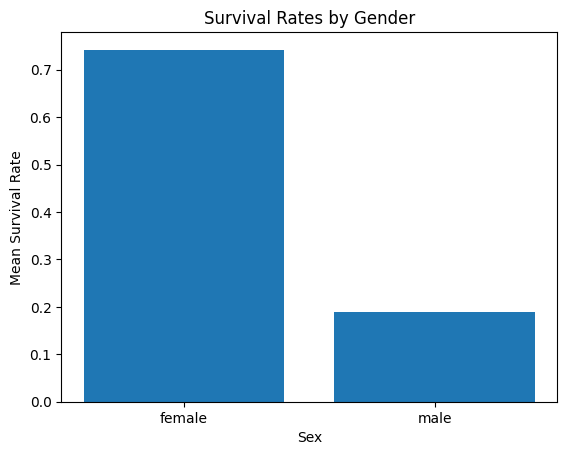

In [4]:
import matplotlib.pyplot as plt

mean_survival = df.groupby('Sex')['Survived'].mean()

plt.bar(mean_survival.index, mean_survival.values)
plt.xlabel("Sex")
plt.ylabel("Mean Survival Rate")
plt.title("Survival Rates by Gender")
plt.show()


Problem - 5:

Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

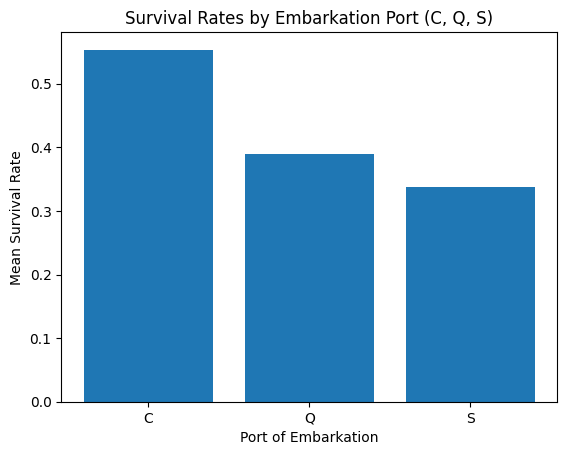

In [6]:
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/aidata/week2/Copy of Titanic-Dataset.csv")
survival_by_port = df.groupby('Embarked')['Survived'].mean()

plt.bar(survival_by_port.index, survival_by_port.values)
plt.xlabel("Port of Embarkation")
plt.ylabel("Mean Survival Rate")
plt.title("Survival Rates by Embarkation Port (C, Q, S)")
plt.show()


Problem - 6{Optional}:
Show how the survival rates (’Survived’) vary by age group and passenger class (’Pclass’). Break up the
’Age’ column into five quantiles in your DataFrame, and then compare the means of ’Survived’ by class
and age group. Draw a visualization using a any plotting library to represent this graphically.


    Age_group  Pclass  Survived
0         0.0       1  0.809524
1         0.0       2  0.742857
2         0.0       3  0.333333
3         1.0       1  0.761905
4         1.0       2  0.400000
5         1.0       3  0.197674
6         2.0       1  0.666667
7         2.0       2  0.416667
8         2.0       3  0.283582
9         3.0       1  0.777778
10        3.0       2  0.461538
11        3.0       3  0.166667
12        4.0       1  0.506667
13        4.0       2  0.363636
14        4.0       3  0.088235


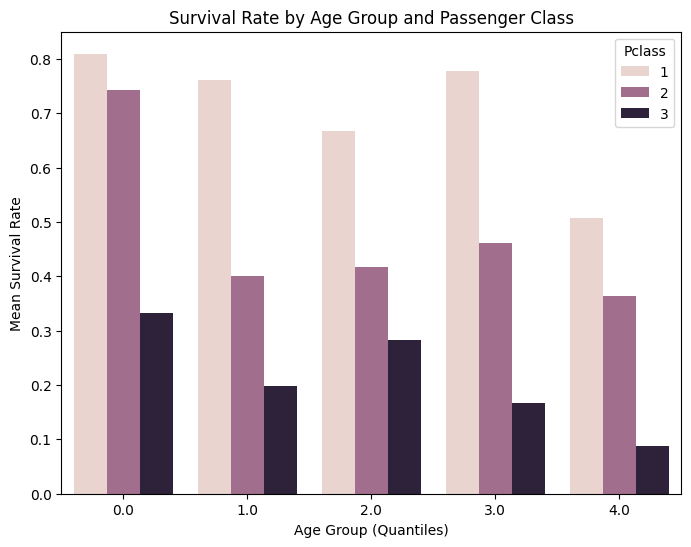

In [8]:
import seaborn as sns

# Create 5 age groups (quantiles)
df['Age_group'] = pd.qcut(df['Age'], 5, labels=False)

# Calculate mean survival for each Age_group x Pclass combination
survival_by_age_class = df.groupby(['Age_group', 'Pclass'])['Survived'].mean().reset_index()

print(survival_by_age_class)

# Visualize
plt.figure(figsize=(8,6))
sns.barplot(x='Age_group', y='Survived', hue='Pclass', data=survival_by_age_class)
plt.xlabel("Age Group (Quantiles)")
plt.ylabel("Mean Survival Rate")
plt.title("Survival Rate by Age Group and Passenger Class")
plt.show()
